In [1]:
import sys
import os

package_path = '..'
if package_path not in sys.path:
    sys.path.append(package_path)

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from roi_rectangle import RoiRectangle

from src.config.config import load_config

In [4]:
from src.filesystem import get_run_scan_directory

def get_npz_data(root: str, run_n: int, scan_n: int) -> dict[str, np.ndarray]:
    npz_dir: str = get_run_scan_directory(root, run_n, scan_n)
    npz_file = os.path.join(npz_dir, f'run={run_n:04}_scan={scan_n:04}.npz')
    return dict(np.load(npz_file))

In [41]:
config = load_config()
npz_dir = config.path.processed_dir
data = get_npz_data(npz_dir, 263, 1)
images = data['pon']
images.shape

(81, 514, 1030)

C:\Users\11HOME_AHCI\AppData\Local\Temp\ipykernel_17512\619748454.py:6: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.log(img))


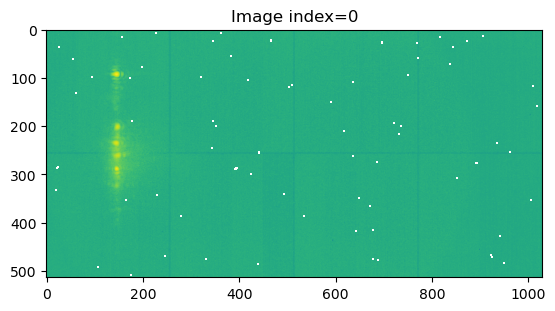

In [49]:
index = 0
img = images[len(images) // 2]

fig, ax = plt.subplots(1, 1)

ax.imshow(np.log(img))
ax.set_title(f"Image index={index}");

C:\Users\11HOME_AHCI\AppData\Local\Temp\ipykernel_17512\2373915045.py:8: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.log(roi_img))


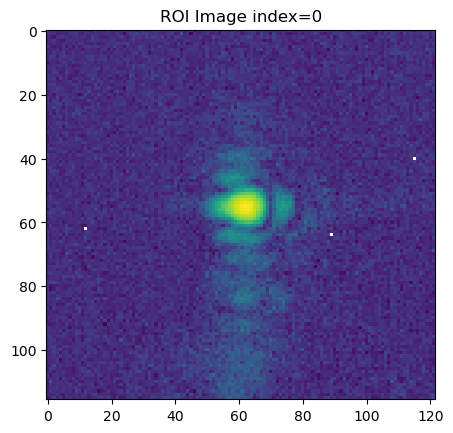

In [53]:
from scipy.ndimage import gaussian_filter

roi_rect: RoiRectangle = RoiRectangle(x1=84, y1=38, x2=206, y2=154)
roi_img = roi_rect.slice(img)
# roi_img = gaussian_filter(roi_img, sigma=0)
fig, ax = plt.subplots(1, 1)

ax.imshow(np.log(roi_img))
ax.set_title(f"ROI Image index={index}");

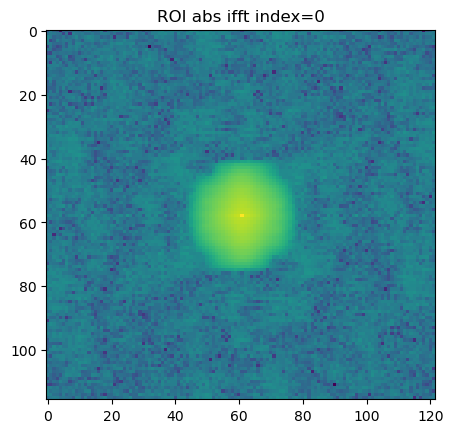

In [54]:
from scipy.fft import ifft2
from numpy.fft import fftshift

fig, ax = plt.subplots(1, 1)

ax.imshow(np.log(np.abs(fftshift(ifft2(roi_img)))))
ax.set_title(f"ROI abs ifft index={index}");

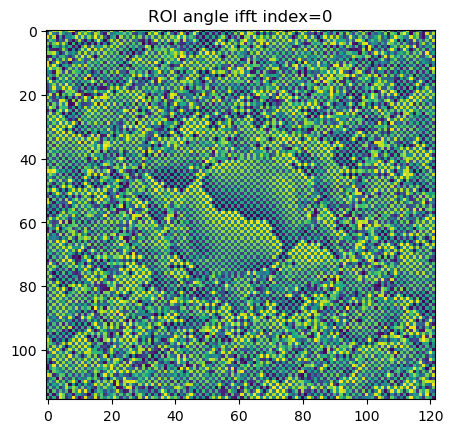

In [55]:
from scipy.fft import ifft2
from numpy.fft import fftshift

fig, ax = plt.subplots(1, 1)

ax.imshow(np.angle(fftshift(ifft2(roi_img))))
ax.set_title(f"ROI angle ifft index={index}");

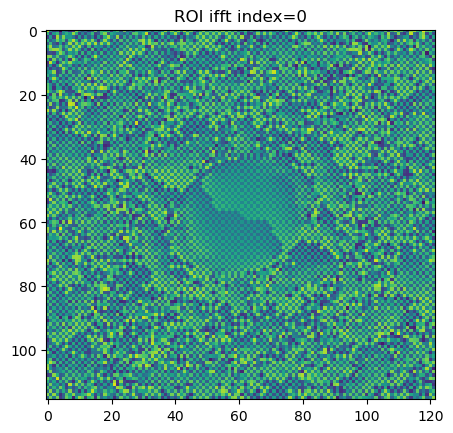

In [59]:
fig, ax = plt.subplots(1, 1)

ax.imshow(np.log(np.abs(fftshift(ifft2(roi_img)))) * np.angle(fftshift(ifft2(roi_img))))
ax.set_title(f"ROI ifft index={index}");

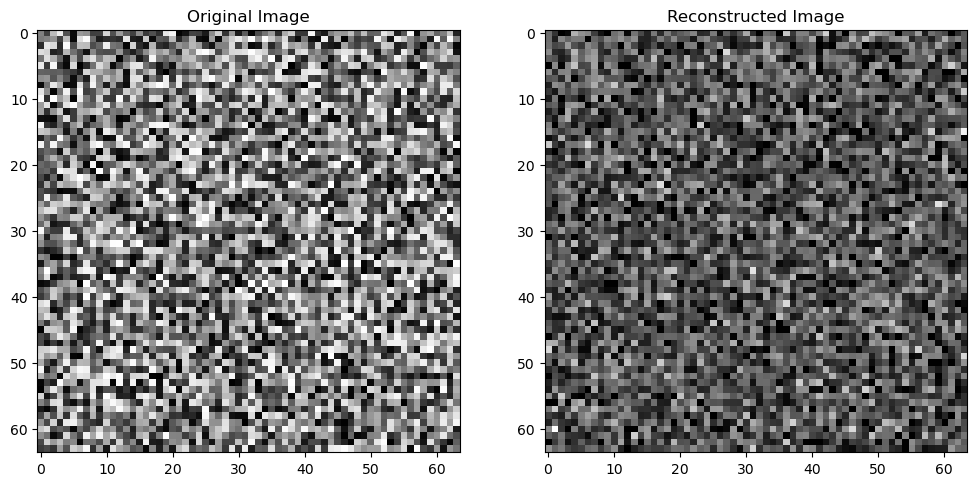

In [60]:
def phase_retrieval(magnitudes, initial_guess, iterations=100):
    x = initial_guess
    for _ in range(iterations):
        X = np.fft.fft2(x)
        X_mag = np.abs(X)
        X_phase = X / X_mag
        X_new = magnitudes * X_phase
        x = np.fft.ifft2(X_new)
        x = np.abs(x)  # 실수부만 사용
    return x

# 예제 데이터 생성
original_fft = roi_img
magnitudes = np.abs(original_fft)

# 초기 추측값 설정
initial_guess = np.random.rand(64, 64)

# 페이즈 리트리벌 수행
reconstructed_image = phase_retrieval(magnitudes, initial_guess)

# 결과 시각화
plt.figure(figsize=(6, 6))

plt.subplot(1, 1, 1)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image, cmap='gray')
plt.show()